<a href="https://colab.research.google.com/github/y31106891/CQF/blob/master/Module_3_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center>Monte Carlo Simulation of a Binary Option</center>
##<center>Ji YU</center>
---


###1. Summary
Suppose there is a **binary option** with following information:  
Todays stock price $S_0$ = 100  
Strike E = 100  
Time to expiry (T - t) = 1 year  
Volatility $\sigma$ = 20%  
Constant risk-free interest rate r = 5%  
Assume the payoff of the binary option =1
<br>
<br>
This report will first calculate the option price of this binary option by Black Scholes Model and Monte Carlo Simulations. Then it will identify and analyze the difference/erros between Black Scholes Model calculation and Monte Carlo Simulations method, assuming The Black Schole Method provides the "correct" option value. And the report will reflact factors affecting the accuracy of Monte Carlo Methods.  
<br>







###2. Black Scholes Model
From Black Schole, Binary call option price formula is <br>

$$e^{-r(T-t)}N(d_2)$$
<br>
Binary put option price formula is <br>
$$e^{-r(T-t)}(1-N(d_2))$$
<br>
where:

$$d=\frac{(log(S/E)+(r-\frac{1}{2})\sigma^2)(T-t)}{\sigma \sqrt{T-t}}$$

<br>
We put the given number into the formula and we can have the option price.
<br>
Binary call option price: 
$V_c$=0.532324815453763

Binary put option price:
$V_p$=0.418904609046951


###3. Monte Carlo Simulation

We will first simulate stock price movement by assuming stock price movement follows Geometric Brownian Motion:

$dS=r*S*d(t)+\sigma*S*\sqrt{dt}\phi$
SSFSDF
Where $\phi$ is a Standard Normal Distribution.
<br><br>

$S_{t+1}-S_t=r*S*d(t)+\sigma*S*\sqrt{dt}*\phi$
<br><br>
Then we will have Euler-Maruyama method:<br>
$S_{t+1}=S_t*(1+r*(dt)+\sigma *\sqrt{dt}\phi)$
<br><br>

Because $(T-t)$ is 1 year, we repeat this process by 1/dt times and we will have $S_T$.  Then we compare $S_T$ to Exercise price E. For the call option, if $S_T>E$, the payoff of this simulation is 1. If $S_T<E$, the payoff of this simulation is 0. Vice versa for a put option. 

By repeating this process for N times we will have N numbers of payoffs. Then the present value of the average of these payoffs will be the option price generated by Monte Carlo Simulations. <br>

$V=e^{-rT}*\frac{\sum{Payoff(S_T)}}{N}$
<br><br>
During the process, there are two factors to be control, dt and N.

In the first part, we will set dt=1/250, which means each simulation will take have 250 time steps, and try different number of simulations (N) to test how N will affect the accuracy of the result.

In the second part, we will set N=10000, and try different number of time steps (1/dt) to test how dt will affect he accuracy of the result.




###3.1 Binary call option with dt=1/250

In the first part, we control dt=1/250 and run Monte Carlo simulations with N range from 500 to 20000 with 500 interval (N=500,1000,1500,etc). Then we calculate Monte Carlo value (option value), Volatility, Standard Error, Standard Error reduction, Absolute Error, Relative Error, and Z-score.
<br><br>
Option value:<br>
$V=e^{-rT}*\frac{\sum{Payoff(S_T)}}{N}$
<br><br>
Monte Carlo Volatility:<br>
$SD(X)=\sqrt{|E(X^{2})-[E(X)]^2|}$<br>
In the code, we will use Numpy.std to calcualte volatility of simulated N option values. 
<br><br>
Standard Error:<br>
$SE=\frac{SD}{\sqrt{N}}$
<br>
In theory, Standard Error delines with increasing $\sqrt{N}$
<br><br>
Absolute Error:<br>
$AE=|V_{Monte Carlo} - V_{Black Scholes}|$
<br><br>
Relative Error:<br>
$RE=\frac{AE}{V_{Black Scholes}}$
<br><br>
Z-score:<br>
$z-score=\frac{|AE|}{\sqrt{N}}$
<br><br>
The code is as followings:

,Simulations,Monte Carlo Value,Monte Carlo Volatility,Standard Error,Error reduction,Theoretical error reduction,Absolute Error,Relative Error,Z-score
0,500,0.542201,0.470931,0.021061,1.000000,1.000000,0.009876,0.018553,0.333125
1,1000,0.539347,0.471325,0.014905,0.707699,0.707107,0.007022,0.013192,0.471110
2,1500,0.553616,0.469175,0.012114,0.575198,0.577350,0.021291,0.039996,0.576989
3,2000,0.530786,0.472404,0.010563,0.501564,0.500000,0.001539,0.002891,0.666250
4,2500,0.535732,0.471800,0.009436,0.448039,0.447214,0.003408,0.006401,0.744890
5,3000,0.529518,0.472550,0.008628,0.409652,0.408248,0.002807,0.005273,0.815986
6,3500,0.539755,0.471270,0.007966,0.378237,0.377964,0.007430,0.013958,0.881365
7,4000,0.535542,0.471824,0.007460,0.354224,0.353553,0.003217,0.006044,0.942219
8,4500,0.537128,0.471620,0.007030,0.333821,0.333333,0.004803,0.009022,0.999374
9,5000,0.536113,0.471751,0.006672,0.316779,0.316228,0.003788,0.007116,1.053433


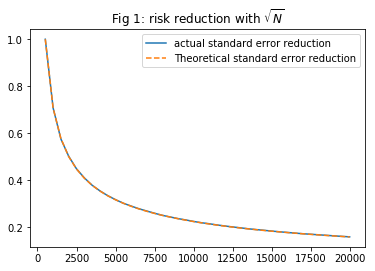

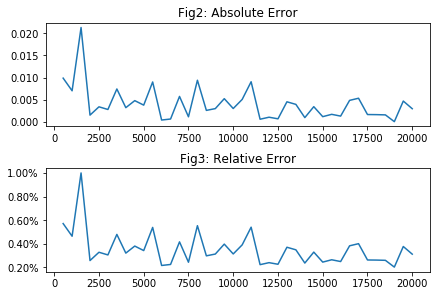

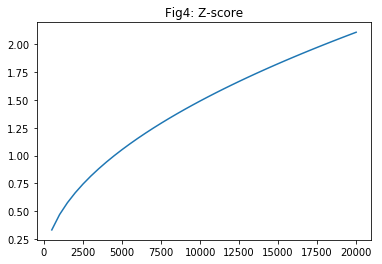

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

E=100
dt=250 #assume 250 trading days in 1 year
vol=0.2
r=0.05
BS=0.5323248
sims=20000
N=500
q=1 # q=1 if it's a call, q=-1 if it's a put

lsto=[] #list of discounted payoff)
lstse=[]   #list of standard error
lstera=[]   #list of actual error reduction
lstert=[]   # list of theroratical error reduction
lstae=[]    #list of absolute error
lstre=[]    #list of relative error
lstv=[]   #list of option value
lstN=[]   #list of N
lststd=[]   #list of standard deviation
lstz=[]   #list of z-score
lstt=[]   #list of dt

lsto.clear
lstse.clear
lstera.clear
lstert.clear
lstae.clear
lstre.clear
lstv.clear
lstN.clear
lststd.clear
lstz.clear
lstt.clear



np.random.seed(0)
while N < (sims+1): #loop simulations from 100 times to "sims" times
  lstN.append(N)
  payoff=0  # for each loop, reset payoff to 0
  for i in range(N): # Monte carlo simulation
    S=100
    for t in range(dt): # Simulate end price S
      rand=np.random.randn(1)
      S=S*(1+r*(1/dt)+vol*np.sqrt(1/dt)*rand) #convert annual riskfree and volatility to daily
    # lsts.append(S.item())
    if S>E: 
      lsto.append(abs(max(q,0))*np.exp(-r))
    else:
      lsto.append(abs(min(q,0))*np.exp(-r))
  #finish MC for N simulations, then calculate errors and values
  V=sum(lsto)/N
  lstv.append(V)
  std=np.std(lsto)
  lststd.append(std)
  se=std/np.sqrt(N)
  lstse.append(se)
  lstera=[x/lstse[0] for x in lstse]
  ae=abs(V-BS)
  lstae.append(ae)
  re=ae/BS
  lstre.append(re)
  lstz=[abs(V-BS)/vol*np.sqrt(n) for n in lstN]
  lstert=[np.sqrt(lstN[0]/x) for x in lstN]
  


  lsto.clear()
  N+=500

# for x in range(len(lstera)):
#     d[x]=lstera[x]-lstert[x]
dict={"Simulations":lstN,"Monte Carlo Value":lstv,"Monte Carlo Volatility": lststd, "Standard Error":lstse, "Error reduction":lstera,"Theoretical error reduction":lstert,"Absolute Error":lstae, "Relative Error":lstre,"Z-score":lstz}
df=pd.DataFrame(dict)
display(df)



fig1,ax=plt.subplots()
ax.plot(lstN,lstera,label="actual standard error reduction")
ax.plot(lstN,lstert,"--",label="Theoretical standard error reduction")
ax.set(title="Fig 1: risk reduction with $\sqrt{N}$ ")
ax.legend()

fig2,(ax1,ax2)=plt.subplots(2,1,constrained_layout=True)
# n,bins,patches=ax.hist(lst,bins=50)
# dist=lognorm.pdf(bins,std,loc=mean)

ax1.plot(lstN,lstae)
ax1.set(title='Fig2: Absolute Error')
ax2.plot(lstN,lstre)
ax2.set(title='Fig3: Relative Error')
vals = ax.get_yticks()
ax2.set_yticklabels(['%1.2f%%' %i for i in vals])

fig3,ax=plt.subplots()
ax.plot(lstN,lstz)
ax.set(title="Fig4: Z-score")

plt.show()


From above table and charts, we can see both Absolute Error and Relative Error generally declines with larger N.  Standard error declines with increasing N at a pace similar to $\frac{1}{\sqrt{N}}$. Z-score increase as number of simulations (N) increases, which means higher number of simulations can provide higher confidence level. The reason above observation is Monte Carlo simulation can be viewed as drawing samples with sample size N. Therefore, the distribution approaches normal distribution due to central limit theorem.

###3.2 Binary put option with dt=1/250

The code for a Binary put option is same as the call except q=-1 and put option price from Black Schole model is 0.418904609046951
<br><br>
The code is as followings:   

,Simulations,Monte Carlo Value,Monte Carlo Volatility,Standard Error,Error reduction,Theoretical error reduction,Absolute Error,Relative Error,Z-score
0,500,0.409029,0.470931,0.021061,1.000000,1.000000,0.009876,0.023576,0.333123
1,1000,0.411882,0.471325,0.014905,0.707699,0.707107,0.007022,0.016763,0.471107
2,1500,0.397614,0.469175,0.012114,0.575198,0.577350,0.021291,0.050825,0.576986
3,2000,0.420443,0.472404,0.010563,0.501564,0.500000,0.001539,0.003673,0.666246
4,2500,0.415497,0.471800,0.009436,0.448039,0.447214,0.003408,0.008135,0.744886
5,3000,0.421712,0.472550,0.008628,0.409652,0.408248,0.002807,0.006701,0.815982
6,3500,0.411475,0.471270,0.007966,0.378237,0.377964,0.007430,0.017737,0.881361
7,4000,0.415687,0.471824,0.007460,0.354224,0.353553,0.003217,0.007680,0.942214
8,4500,0.414102,0.471620,0.007030,0.333821,0.333333,0.004803,0.011465,0.999369
9,5000,0.415117,0.471751,0.006672,0.316779,0.316228,0.003788,0.009043,1.053428


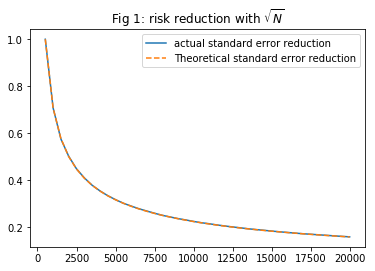

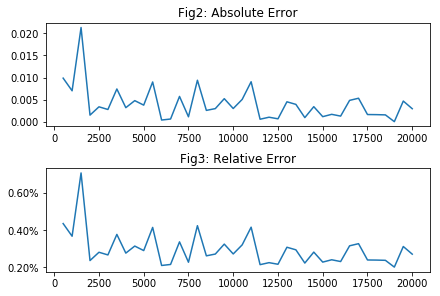

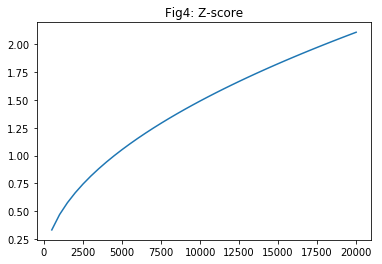

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


E=100
dt=250 #assume 250 trading days in 1 year
vol=0.2
r=0.05
BS=0.418904609046951
sims=20000
N=500
q=-1 # q=1 if it's a call, q=-1 if it's a put

lsto=[] #list of discounted payoff)
lstse=[]   #list of standard error
lstera=[]   #list of actual error reduction
lstert=[]   # list of theroratical error reduction
lstae=[]    #list of absolute error
lstre=[]    #list of relative error
lstv=[]   #list of option value
lstN=[]   #list of N
lststd=[]   #list of standard deviation
lstz=[]   #list of z-score
lstt=[]   #list of dt

lsto.clear
lstse.clear
lstera.clear
lstert.clear
lstae.clear
lstre.clear
lstv.clear
lstN.clear
lststd.clear
lstz.clear
lstt.clear



np.random.seed(0)
while N < (sims+1): #loop simulations from 100 times to "sims" times
  lstN.append(N)
  payoff=0  # for each loop, reset payoff to 0
  for i in range(N): # Monte carlo simulation
    S=100
    for t in range(dt): # Simulate end price S
      rand=np.random.randn(1)
      S=S*(1+r*(1/dt)+vol*np.sqrt(1/dt)*rand) #convert annual riskfree and volatility to daily
    # lsts.append(S.item())
    if S>E: 
      lsto.append(abs(max(q,0))*np.exp(-r))
    else:
      lsto.append(abs(min(q,0))*np.exp(-r))
  #finish MC for N simulations, then calculate errors and values
  V=sum(lsto)/N
  lstv.append(V)
  std=np.std(lsto)
  lststd.append(std)
  se=std/np.sqrt(N)
  lstse.append(se)
  lstera=[x/lstse[0] for x in lstse]
  ae=abs(V-BS)
  lstae.append(ae)
  re=ae/BS
  lstre.append(re)
  lstz=[abs(V-BS)/vol*np.sqrt(n) for n in lstN]
  lstert=[np.sqrt(lstN[0]/x) for x in lstN]
  


  lsto.clear()
  N+=500


dict={"Simulations":lstN,"Monte Carlo Value":lstv,"Monte Carlo Volatility": lststd, "Standard Error":lstse, "Error reduction":lstera,"Theoretical error reduction":lstert,"Absolute Error":lstae, "Relative Error":lstre,"Z-score":lstz}
df=pd.DataFrame(dict)
display(df)





fig1,ax=plt.subplots()
ax.plot(lstN,lstera,label="actual standard error reduction")
ax.plot(lstN,lstert,"--",label="Theoretical standard error reduction")
ax.set(title="Fig 1: risk reduction with $\sqrt{N}$ ")
ax.legend()

fig2,(ax1,ax2)=plt.subplots(2,1,constrained_layout=True)
# n,bins,patches=ax.hist(lst,bins=50)
# dist=lognorm.pdf(bins,std,loc=mean)

ax1.plot(lstN,lstae)
ax1.set(title='Fig2: Absolute Error')
ax2.plot(lstN,lstre)
ax2.set(title='Fig3: Relative Error')
vals = ax.get_yticks()
ax2.set_yticklabels(['%1.2f%%' %i for i in vals])

fig3,ax=plt.subplots()
ax.plot(lstN,lstz)
ax.set(title="Fig4: Z-score")

plt.show()


From the table and graphes above, we can see that Monte Carlo simulations for binary put and call option using same set of random number will have same volatility, therefore, same standard error and z-score. Put and call options also have sames absolute error. The reason is being that suppose for a simulation with size N generates X number of $S_T > E$, then there are (N-X) number of $S_T < E$. In another word, $P(S_T>E)=1-P(S_T<E)$. The distribuion is essentially a Binomial distribution. Therefore, $P(S_T>E)$ and $1-P(S_T<E)$ have same volatility.

###3.3 Binary call option with N=5000

In the this part, we control N=5000 and run Monte Carlo simulations with dt range from 100 to 1000 with 100 interval (dt=100,200,300,etc). Then we calculate Monte Carlo value (option value), Volatility, Standard Error, Standard Error reduction, Absolute Error, Relative Error, and Z-score using same formula as above.

<br><br>
The code is as followings:   

,Simulations,dt,Monte Carlo Value,Monte Carlo Volatility,Standard Error,Error reduction,Theoretical error reduction,Absolute Error,Relative Error,Z-score
0,5000,100,0.546767,0.470262,0.006651,1.000000,1.0,0.014442,0.027130,0.061317
1,5000,300,0.538586,0.471428,0.006667,1.002478,1.0,0.006261,0.011762,0.061317
2,5000,500,0.519371,0.473598,0.006698,1.007092,1.0,0.012954,0.024334,0.061317
3,5000,700,0.534210,0.471991,0.006675,1.003677,1.0,0.001886,0.003542,0.061317
4,5000,900,0.538396,0.471453,0.006667,1.002532,1.0,0.006071,0.011405,0.061317
5,5000,1100,0.534210,0.471991,0.006675,1.003677,1.0,0.001886,0.003542,0.061317
6,5000,1300,0.523747,0.473173,0.006692,1.006189,1.0,0.008578,0.016114,0.061317
7,5000,1500,0.531547,0.472314,0.006680,1.004364,1.0,0.000778,0.001461,0.061317
8,5000,1700,0.536493,0.471702,0.006671,1.003062,1.0,0.004169,0.007831,0.061317
9,5000,1900,0.529264,0.472579,0.006683,1.004927,1.0,0.003061,0.005750,0.061317


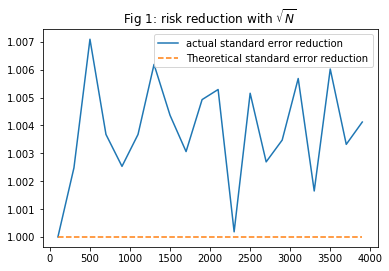

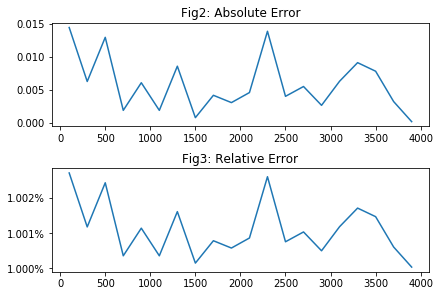

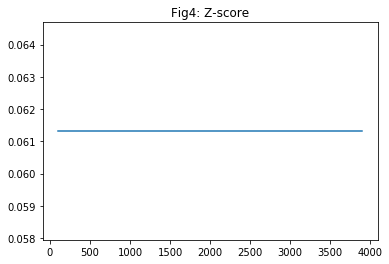

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


E=100
dt=100 #assume 250 trading days in 1 year
vol=0.2
r=0.05
BS=0.5323248
N=5000
q=1 # q=1 if it's a call, q=-1 if it's a put

lsto=[] #list of discounted payoff)
lstse=[]   #list of standard error
lstera=[]   #list of actual error reduction
lstert=[]   # list of theroratical error reduction
lstae=[]    #list of absolute error
lstre=[]    #list of relative error
lstv=[]   #list of option value
lstN=[]   #list of N
lststd=[]   #list of standard deviation
lstz=[]   #list of z-score
lstt=[]   #list of dt

lsto.clear
lstse.clear
lstera.clear
lstert.clear
lstae.clear
lstre.clear
lstv.clear
lstN.clear
lststd.clear
lstz.clear
lstt.clear



np.random.seed(0)
while dt < (4001): #loop simulations from 100 times to "sims" times
  lstt.append(dt)
  lstN.append(N)
  payoff=0  # for each loop, reset payoff to 0
  for i in range(N): # Monte carlo simulation
    S=100
    for t in range(dt): # Simulate end price S
      rand=np.random.randn(1)
      S=S*(1+r*(1/dt)+vol*np.sqrt(1/dt)*rand) #convert annual riskfree and volatility to daily
    # lsts.append(S.item())
    if S>E: 
      lsto.append(abs(max(q,0))*np.exp(-r))
    else:
      lsto.append(abs(min(q,0))*np.exp(-r))
  #finish MC for N simulations, then calculate errors and values
  V=sum(lsto)/N
  lstv.append(V)
  std=np.std(lsto)
  lststd.append(std)
  se=std/np.sqrt(N)
  lstse.append(se)
  lstera=[x/lstse[0] for x in lstse]
  ae=abs(V-BS)
  lstae.append(ae)
  re=ae/BS
  lstre.append(re)
  lstz=[abs(V-BS)/vol*np.sqrt(n) for n in lstN]
  lstert=[np.sqrt(lstN[0]/x) for x in lstN]
  


  lsto.clear()
  dt+=200

# for x in range(len(lstera)):
#     d[x]=lstera[x]-lstert[x]
dict={"Simulations":lstN,"dt":lstt,"Monte Carlo Value":lstv,"Monte Carlo Volatility": lststd, "Standard Error":lstse, "Error reduction":lstera,"Theoretical error reduction":lstert,"Absolute Error":lstae, "Relative Error":lstre,"Z-score":lstz}
df=pd.DataFrame(dict)
display(df)

# print("sims=", lstN)
# print("Values=",lstv)
# print("SD=",lststd)
# print("SE=",lstse)
# print("AE=", lstae)
# print("RE=",lstre)
# print("z-score=",lstz)




fig1,ax=plt.subplots()
ax.plot(lstt,lstera,label="actual standard error reduction")
ax.plot(lstt,lstert,"--",label="Theoretical standard error reduction")
ax.set(title="Fig 1: risk reduction with $\sqrt{N}$ ")
ax.legend()

fig2,(ax1,ax2)=plt.subplots(2,1,constrained_layout=True)
# n,bins,patches=ax.hist(lst,bins=50)
# dist=lognorm.pdf(bins,std,loc=mean)

ax1.plot(lstt,lstae)
ax1.set(title='Fig2: Absolute Error')
ax2.plot(lstt,lstre)
ax2.set(title='Fig3: Relative Error')
vals = ax.get_yticks()
ax2.set_yticklabels(['%.3f%%' %i for i in vals])

fig3,ax=plt.subplots()
ax.plot(lstt,lstz)
ax.set(title="Fig4: Z-score")

plt.show()

From above table and charts we can see Standard Error does not change much with increasing number of time steps(dt), therefore, z-score does not change. But Absolute Error and Relative Error still declines. 

###3.4 Binary put option with N=5000

The code for a Binary put option is same as the call except q=-1 and put option price from Black Schole model is 0.418904609046951
<br><br>
The code is as followings:  

,Simulations,dt,Monte Carlo Value,Monte Carlo Volatility,Standard Error,Error reduction,Theoretical error reduction,Absolute Error,Relative Error,Z-score
0,5000,100,0.404463,0.470262,0.006651,1.000000,1.0,0.014442,0.034475,0.061312
1,5000,300,0.412643,0.471428,0.006667,1.002478,1.0,0.006261,0.014947,0.061312
2,5000,500,0.431858,0.473598,0.006698,1.007092,1.0,0.012954,0.030922,0.061312
3,5000,700,0.417019,0.471991,0.006675,1.003677,1.0,0.001886,0.004501,0.061312
4,5000,900,0.412834,0.471453,0.006667,1.002532,1.0,0.006071,0.014493,0.061312
5,5000,1100,0.417019,0.471991,0.006675,1.003677,1.0,0.001886,0.004501,0.061312
6,5000,1300,0.427483,0.473173,0.006692,1.006189,1.0,0.008578,0.020477,0.061312
7,5000,1500,0.419682,0.472314,0.006680,1.004364,1.0,0.000778,0.001857,0.061312
8,5000,1700,0.414736,0.471702,0.006671,1.003062,1.0,0.004169,0.009951,0.061312
9,5000,1900,0.421965,0.472579,0.006683,1.004927,1.0,0.003061,0.007307,0.061312


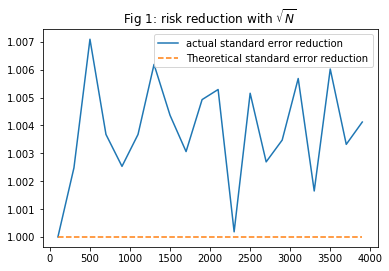

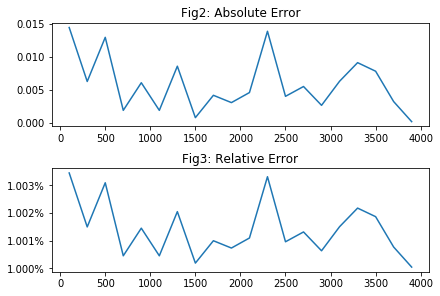

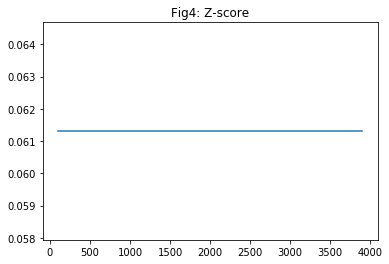

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

E=100
dt=100 #assume 250 trading days in 1 year
vol=0.2
r=0.05
BS=0.418904609046951
N=5000
q=-1 # q=1 if it's a call, q=-1 if it's a put

lsto=[] #list of discounted payoff)
lstse=[]   #list of standard error
lstera=[]   #list of actual error reduction
lstert=[]   # list of theroratical error reduction
lstae=[]    #list of absolute error
lstre=[]    #list of relative error
lstv=[]   #list of option value
lstN=[]   #list of N
lststd=[]   #list of standard deviation
lstz=[]   #list of z-score
lstt=[]   #list of dt

lsto.clear
lstse.clear
lstera.clear
lstert.clear
lstae.clear
lstre.clear
lstv.clear
lstN.clear
lststd.clear
lstz.clear
lstt.clear



np.random.seed(0)
while dt < (4001): #loop simulations from 100 times to "sims" times
  lstt.append(dt)
  lstN.append(N)
  payoff=0  # for each loop, reset payoff to 0
  for i in range(N): # Monte carlo simulation
    S=100
    for t in range(dt): # Simulate end price S
      rand=np.random.randn(1)
      S=S*(1+r*(1/dt)+vol*np.sqrt(1/dt)*rand) #convert annual riskfree and volatility to daily
    # lsts.append(S.item())
    if S>E: 
      lsto.append(abs(max(q,0))*np.exp(-r))
    else:
      lsto.append(abs(min(q,0))*np.exp(-r))
  #finish MC for N simulations, then calculate errors and values
  V=sum(lsto)/N
  lstv.append(V)
  std=np.std(lsto)
  lststd.append(std)
  se=std/np.sqrt(N)
  lstse.append(se)
  lstera=[x/lstse[0] for x in lstse]
  ae=abs(V-BS)
  lstae.append(ae)
  re=ae/BS
  lstre.append(re)
  lstz=[abs(V-BS)/vol*np.sqrt(n) for n in lstN]
  lstert=[np.sqrt(lstN[0]/x) for x in lstN]
  


  lsto.clear()
  dt+=200

# for x in range(len(lstera)):
#     d[x]=lstera[x]-lstert[x]
dict={"Simulations":lstN,"dt":lstt,"Monte Carlo Value":lstv,"Monte Carlo Volatility": lststd, "Standard Error":lstse, "Error reduction":lstera,"Theoretical error reduction":lstert,"Absolute Error":lstae, "Relative Error":lstre,"Z-score":lstz}
df=pd.DataFrame(dict)
display(df) 



fig1,ax=plt.subplots()
ax.plot(lstt,lstera,label="actual standard error reduction")
ax.plot(lstt,lstert,"--",label="Theoretical standard error reduction")
ax.set(title="Fig 1: risk reduction with $\sqrt{N}$ ")
ax.legend()

fig2,(ax1,ax2)=plt.subplots(2,1,constrained_layout=True)
# n,bins,patches=ax.hist(lst,bins=50)
# dist=lognorm.pdf(bins,std,loc=mean)

ax1.plot(lstt,lstae)
ax1.set(title='Fig2: Absolute Error')
ax2.plot(lstt,lstre)
ax2.set(title='Fig3: Relative Error')
vals = ax.get_yticks()
ax2.set_yticklabels(['%.3f%%' %i for i in vals])

fig3,ax=plt.subplots()
ax.plot(lstt,lstz)
ax.set(title="Fig4: Z-score")

plt.show()


For the Binary options with N controlled at 5000, put and call option using same set of random number will also have same volatility, therefore, same standard error and z-score. Put and call options also have sames absolute error for the same reason. Binary Put option also shows lower Absolute Error and Relative Error with more time steps (dt).

###4 Conclusion

From above simulations, we can see Monte Carlo simulations' accuracy meansured as the absolute and relative error in respect to Black Scholes model improves with more number of simulations (N) and more time steps (dt). The standard error and z-score of Monte Carlo simulations are lower with N, but are not affect by dt. 

For a Binary Option, the call and put will show same volatility from Monte Carlo simulations, therefore, same standard error, z-score and absolute error.

In [0]:
### THIS PART IS NOT INCLUDED IN THE SUBMISSION


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

E=100
T=4000
dt=500 
vol=0.2
r=0.05
BS=0.418904609046951
sims=10000
N=500
q=-1 # q=1 if it's a call, q=-1 if it's a put

lsto=[] #list of discounted payoff)
lstse=[]   #list of standard error
lstera=[]   #list of actual error reduction
lstert=[]   # list of theroratical error reduction
lstae=[]    #list of absolute error
lstre=[]    #list of relative error
lstv=[]   #list of option value
lstN=[]   #list of N
lststd=[]   #list of standard deviation
lstz=[]   #list of z-score
lstt=[]   #list of dt
dic={}

lsto.clear
lstse.clear
lstera.clear
lstert.clear
lstae.clear
lstre.clear
lstv.clear
lstN.clear
lststd.clear
lstz.clear
lstt.clear



np.random.seed(0)
while N <=sims:
  lstN.append(N)
  while dt <= T: #loop simulations from 100 times to "sims" times
    
    payoff=0  # for each loop, reset payoff to 0
    for i in range(N): # Monte carlo simulation
      S=100
      for t in range(dt): # Simulate end price S
        rand=np.random.randn(1)
        S=S*(1+r*(1/dt)+vol*np.sqrt(1/dt)*rand) #convert annual riskfree and volatility to daily
      # lsts.append(S.item())
      if S>E: 
        lsto.append(abs(max(q,0))*np.exp(-r))
      else:
        lsto.append(abs(min(q,0))*np.exp(-r))
    #finish MC for N simulations, then calculate errors and values
    V=sum(lsto)/N
    # lstv.append(V)
    # std=np.std(lsto)
    # lststd.append(std)
    # se=std/np.sqrt(N)
    # lstse.append(se)
    # lstera=[x/lstse[0] for x in lstse]
    ae=abs(V-BS)
    lstae.append(ae)
    # re=ae/BS
    # lstre.append(re)
    # lstz=[abs(V-BS)/vol*np.sqrt(n) for n in lstN]
    # lstert=[np.sqrt(lstN[0]/x) for x in lstN]
    
    
    lsto.clear()
    dt+=500


  dic[str(N)]=[float(x) for x in lstae]
  dt=500
  lstae.clear()
  
  N+=1000 

while dt <=T: 
  lstt.append(dt)
  dt+=500
# for x in range(len(lstera)):
#     d[x]=lstera[x]-lstert[x]
# dict={"Simulations":lstN,"dt":lstt,"Monte Carlo Value":lstv,"Monte Carlo Volatility": lststd, "Standard Error":lstse, "Error reduction":lstera,"Theoretical error reduction":lstert,"Absolute Error":lstae, "Relative Error":lstre,"Z-score":lstz}
df=pd.DataFrame(dic,index=lstt)
display(df) 




,500,1500,2500,3500,4500,5500,6500,7500,8500,9500
500,0.001539,0.009242,0.016758,0.001267,0.007035,0.012089,0.000661,0.002553,0.001259,0.002941
1000,0.011778,0.013047,0.004169,0.003169,0.004075,0.014892,0.006222,0.001285,0.007973,0.001365
1500,0.007973,0.004710,0.003788,0.000092,0.001116,0.000501,0.006661,0.008861,0.004672,0.007973
2000,0.020563,0.016758,0.005344,0.004440,0.011778,0.010222,0.003730,0.001378,0.003553,0.001739
2500,0.000364,0.014315,0.003788,0.002538,0.004380,0.000501,0.003880,0.000144,0.003161,0.005143
3000,0.000364,0.013588,0.000778,0.003625,0.007551,0.001920,0.003144,0.002393,0.000811,0.005544
3500,0.021291,0.002173,0.008354,0.009692,0.001539,0.002958,0.000807,0.010924,0.002378,0.004142
4000,0.007973,0.014949,0.005691,0.004712,0.002266,0.008665,0.007681,0.003568,0.001259,0.001165
